# **BUISNESS CASE**:

 BASED ON GIVEN FEATURE OF DATASET WE NEED TO PREDICT WHICH CUSTOMER MAKE TRANSACTION IN THE FEATURE IRRESPTIVE OF THE AMOUNT OF MONEY TRANSACTED

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# **DATA**  **LOAD**

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Capstone project/fraud detection/train(1).csv")
pd.set_option("display.max_columns",None)

# **BASIC** **CHECK**

In [ ]:
# check the first 5 rows
data.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,3.8743,-5.2387,7.3746,11.5767,12.0446,11.6418,-7.0170,5.9226,-14.2136,16.0283,5.3253,12.9194,29.0460,-0.6940,5.1736,-0.7474,14.8322,11.2668,5.3822,2.0183,10.1166,16.1828,4.9590,2.0771,-0.2154,8.6748,9.5319,5.8056,22.4321,5.0109,-4.7010,21.6374,0.5663,5.1999,8.8600,43.1127,18.3816,-2.3440,23.4104,6.5199,12.1983,13.6468,13.8372,1.3675,2.9423,-4.5213,21.4669,9.3225,16.4597,7.9984,-1.7069,-21.4494,6.7806,11.0924,9.9913,14.8421,0.1812,8.9642,16.2572,2.1743,-3.4132,9.4763,13.3102,26.5376,1.4403,14.7100,6.0454,9.5426,17.1554,14.1104,24.3627,2.0323,6.7602,3.9141,-0.4851,2.5240,1.5093,2.5516,15.5752,-13.4221,7.2739,16.0094,9.7268,0.8897,0.7754,4.2218,12.0039,13.8571,-0.7338,-1.9245,15.4462,12.8287,0.3587,9.6508,6.5674,5.1726,3.1345,29.4547,31.4045,2.8279,15.6599,8.3307,-5.6011,19.0614,11.2663,8.6989,8.3694,11.5659,-16.4727,4.0288,17.9244,18.5177,10.7800,9.0056,16.6964,10.4838,1.6573,12.1749,-13.1324,17.6054,11.5423,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,3.6783,-11.1147,1.8730,9.8775,11.7842,1.2444,-47.3797,7.3718,0.1948,34.4014,25.7037,11.8343,13.2256,-4.1083,6.6885,-8.0946,18.5995,19.3219,7.0118,1.9210,8.8682,8.0109,-7.2417,1.7944,-1.3147,8.1042,1.5365,5.4007,7.9344,5.0220,2.2302,40.5632,0.5134,3.1701,20.1068,7.7841,7.0529,3.2709,23.4822,5.5075,13.7814,2.5462,18.1782,0.3683,-4.8210,-5.4850,13.7867,-13.5901,11.0993,7.9022,12.2301,0.4768,6.8852,8.0905,10.9631,11.7569,-1.2722,24.7876,26.6881,1.8944,0.6939,-13.6950,8.4068,35.4734,1.7093,15.1866,2.6227,7.3412,32.0888,13.9550,13.0858,6.6203,7.1051,5.3523,8.5426,3.6159,4.1569,3.0454,7.8522,-11.5100,7.5109,31.5899,9.5018,8.2736,10.1633,0.1225,12.5942,14.5697

In [ ]:
# check last five rows
data.tail()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,-0.6209,5.6669,3.7574,-9.5348,13.9860,5.2982,8.2705,14.1527,7.4540,-5.0105,12.0465,8.6349,9.9137,25.1376,1.0914,3.2326,7.7802,13.9939,2.9085,0.1005,4.2369,7.5665,-9.2149,9.5746,1.4012,7.4211,11.0075,7.8080,4.5567,4.9861,9.7471,0.0722,5.9053,8.1743,10.8800,11.1665,4.2600,-2.1296,8.7833,-15.5727,-8.4916,22.1905,12.4110,15.1168,1.6041,6.1868,10.9576,18.7371,15.2986,5.7322,5.1244,9.8225,14.0315,-23.6064,-1.3403,-2.5577,6.3582,-5.4557,5.6063,7.0054,5.0171,-5.0055,28.9502,1.2297,4.4918,19.5568,20.8357,19.2136,17.6422,17.9836,4.0395,14.0761,-5.7878,16.3870,-14.1721,-13.0269,-2.5955,21.4526,15.6163,0.9845,8.2110,-0.8553,-12.1682,6.7779,7.3895,10.5084,15.5057,-0.6812,5.8999,6.1825,3.1038,-1.6930,-18.8473,9.9358,25.3359,1.3647,11.8509,5.0357,6.4630,18.4008,14.3787,19.0369,-0.6364,6.9155,3.6763,3.1460,4.9442,-1.8289,1.3521,34.6265,-0.6869,-5.3781,20.5030,10.9614,4.9677,6.1408,2.2575,12.8757,14.2253,-1.2868,0.2212,16.8661,12.7663,1.2414,7.1304,7.4108,-6.3369,3.0760,24.9796,20.3410,5.3312,23.7116,2.4745,11.2013,17.8165,13.0057,9.5506,5.3589,13.2491,-3.3068,3.6998,2.5927,14.3025,8.1596,7.9609,18.3343,4.3086,1.3546,12.4158,-5.3985,16.3683,10.4522,35.4923,5.5477,7.4244,12.5459,-6.7840,31.1895,2.6529,-11.1867,9.8865,5.4730,-5.3880,-0.4698,24.4025,-5.4493,11.3529,7.7075,-5.0491,13.0756,15.8271,3.3580,-14.3371,10.4421,7.6530,9.4585,22.7783,-4.0305,4.2233,-6.3906,13.5058,-0.4594,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,-3.6797,6.0019,6.5576,-11.8776,14.4131,3.3087,3.5800,14.1597,7.5191,-8.8715,17.9467,17.0237,6.6459,18.2345,0.8982,2.2532,15.4977,13.3282,5.2281,-3.7424,5.5144,5.7148,-13.7470,7.4369,1.3041,12.7552,12.5362,-1.1002,2.4370,6.2631,14.8565,-2.9862,-7.8820,7.1320,11.8869,11.4218,8.9282,-27.2007,14.5962,-19.8502,26.0775,24.3915,12.6910,10.2453,6.8173,4.5666,-9.5685,18.4685,16.9534,7.3660,4.7038,9.4559,6.0037,-10.8728,0.7859,4.7000,7.8077,-1.7926,6.1534,12.9087,5.0398,-0.4247,22.6256,0.7166,0.6533,13.5821,20.3267,25.5380,14.0155,17.3326,4.2046,14.0195,11.4812,17.9954,-18.3549,-3.4537,1.1233,22.3135,1.9795,16.0239,4.7492,0.2446,-39.6406,6.9473,9.9392,11.1977,14.1006,-0.8012,18.8214,32.9827,1.7989,-0.2476,-15.5294,9.5501,11.8548,1.5127,11.3998,4.2304,6.6777,11.3434,14.2993,13.1205,13.3224,7.3143,3.6817,9.7780,4.0491,2.7221,4.4344,3.7648,2.1927,-2.9197,23.0679,12.2112,

In [ ]:
# check columns
data.columns

Index(['ID_code', 'target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4',
       'var_5', 'var_6', 'var_7',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=202)

### Observations:
1. **ID_code**: Likely an identifier column, which should be excluded from predictive modeling.
2. **target**: The dependent variable indicating whether a customer made a transaction (binary: 1 for transaction, 0 for no transaction).
3. **var_0 to var_199**: 200 features representing customer-related data, which will be used for training the machine learning model.
4. **Feature Type**: The dataset contains both numerical features (var_0 to var_199) and categorical (ID_code) data.
5. **Target Variable**: The `target` column should be treated as a binary classification label.


In [ ]:
# shape of data
data.shape

(200000, 202)

The dataset has 200,000 rows (observations) and 202 columns, including the target variable and 200 features (`var_0` to `var_199`).


In [ ]:
# stastitical information
data.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2000

 No constant column is present in data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


The dataset has 200 columns of type float64, 1 column of type int64, and 1 column of type object.

# **EXPLOTARY** **DATA** **ANALYSIS**

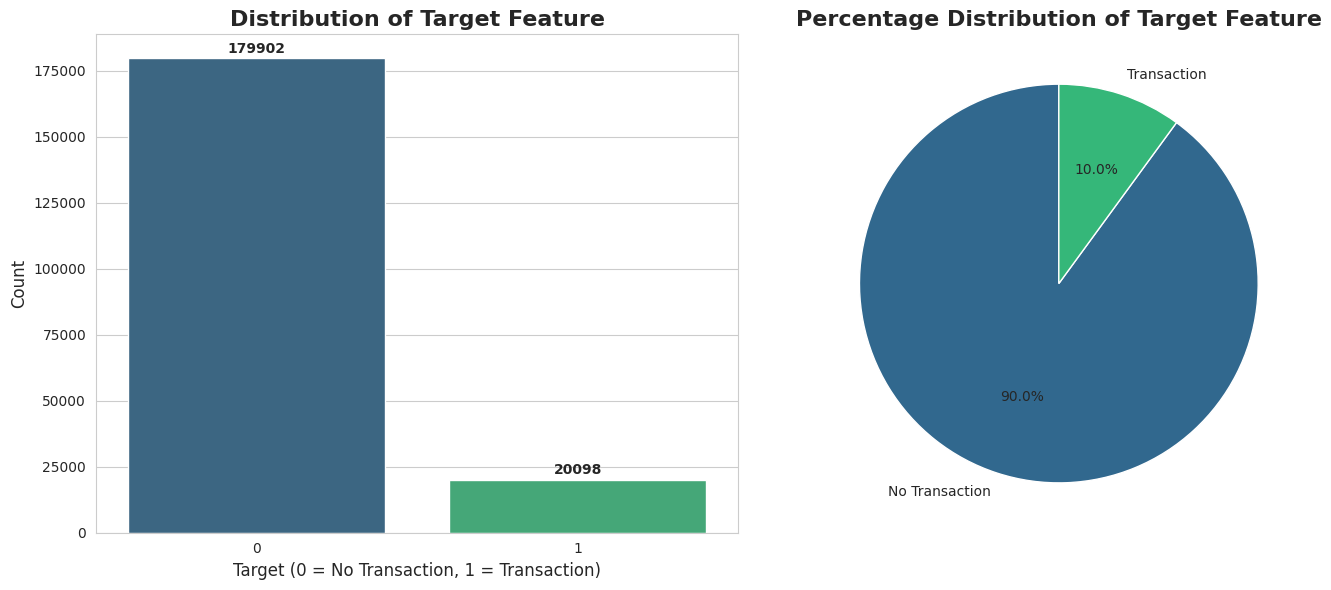

In [ ]:

sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Subplot 1: Countplot
sns.countplot(ax=axes[0], x=data['target'], palette="viridis")
axes[0].set_title("Distribution of Target Feature", fontsize=16, fontweight='bold')
axes[0].set_xlabel("Target (0 = No Transaction, 1 = Transaction)", fontsize=12)
axes[0].set_ylabel("Count", fontsize=12)

# Annotate the bars with counts
for p in axes[0].patches:
    axes[0].text(p.get_x() + p.get_width() / 2, p.get_height() + 2000, int(p.get_height()),
                 ha='center', fontsize=10, fontweight='bold')

# Subplot 2: Pie Chart
target_counts = data['target'].value_counts()
labels = target_counts.index.map({0: 'No Transaction', 1: 'Transaction'})
axes[1].pie(target_counts, labels=labels, autopct='%1.1f%%', startangle=90,
            colors=sns.color_palette("viridis", len(target_counts)))
axes[1].set_title("Percentage Distribution of Target Feature", fontsize=16, fontweight='bold')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


The target variable is imbalanced, with 90% of customers (179,902) not making a transaction and only 10% (20,098) making a transaction.

### **IMPORTANT** **NOTE**:
* *IN THIS DATA WE NOT DO ANY DOMAIN ANALYSIS BECAUSE OF WE DONT HAVE ANY FEATURE NAME BECAUSE THE DATA IS CONTAIN PRIVATE INFORMATION OF CUSTOMER DETAILS OF BANK*

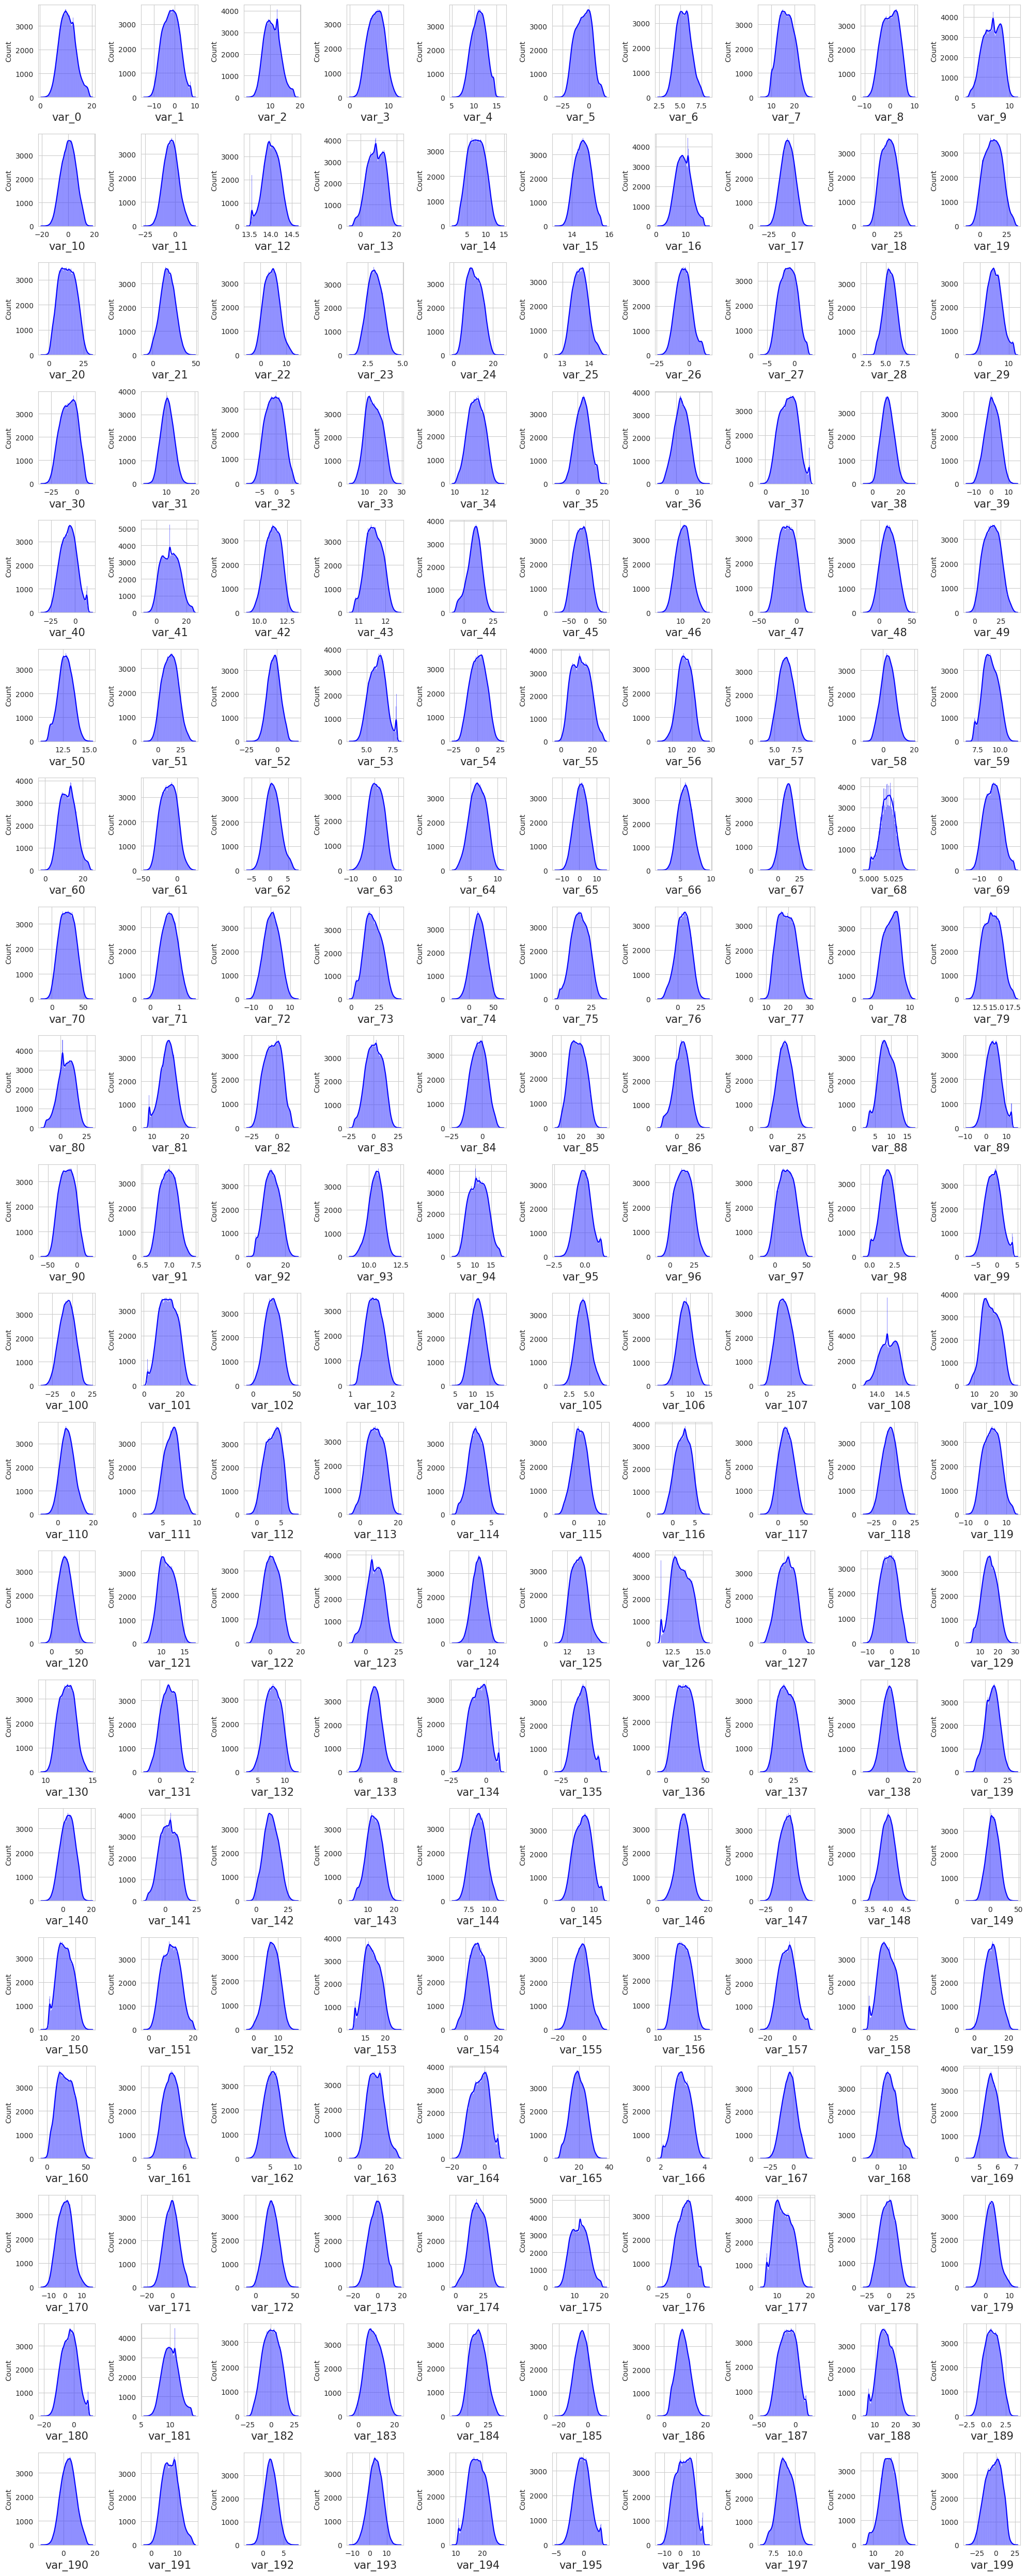

In [ ]:
l = [i for i in data.columns if data[i].dtype in ['float64']]

plt.figure(figsize=(20,50))
plotnumber=1
for i in l:
  if plotnumber<=200:
    plt.subplot(20,10,plotnumber)
    sns.histplot(data[i],kde=True,color='blue')
    plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [ ]:
skewness_list = data.select_dtypes(include=['float64']).skew().tolist()
skewness_list


[0.23563875479914556,
 0.05311530271125714,
 0.2603134952782586,
 -0.0035481510136241546,
 -0.04820982935439491,
 -0.0020375254951404136,
 0.1494759527545477,
 0.08459764110006057,
 -0.10464329109503873,
 -0.1754330956908809,
 -0.05671568939475907,
 0.07054891206831918,
 -0.143663865701705,
 -0.17689701601244578,
 0.03834730828585969,
 0.03551075961890691,
 0.19196772373035795,
 -0.05367148275446026,
 0.08862496611481553,
 0.050516515753651195,
 0.05991790627872293,
 -0.001674850171244149,
 0.1566112179302501,
 0.06295186042915407,
 0.14221728502285513,
 0.175815442719296,
 0.17276989517849486,
 0.020910455575631957,
 -0.04162623741623385,
 0.20036429040400422,
 -0.1132466968290989,
 0.0747452468673013,
 0.003090557783798513,
 0.08940577191451794,
 -0.029668704073639387,
 -0.02130383546288887,
 -0.04943228791375243,
 0.043867212135395454,
 0.11097194822060243,
 -0.05548748954128383,
 0.04394665895405557,
 0.1385048718308839,
 -0.13851153461065335,
 -0.02100183330164443,
 -0.34017215733

# **Observation**

* The data shows a majority of columns with skewness values close to zero, indicating that many of the distributions are nearly normal.


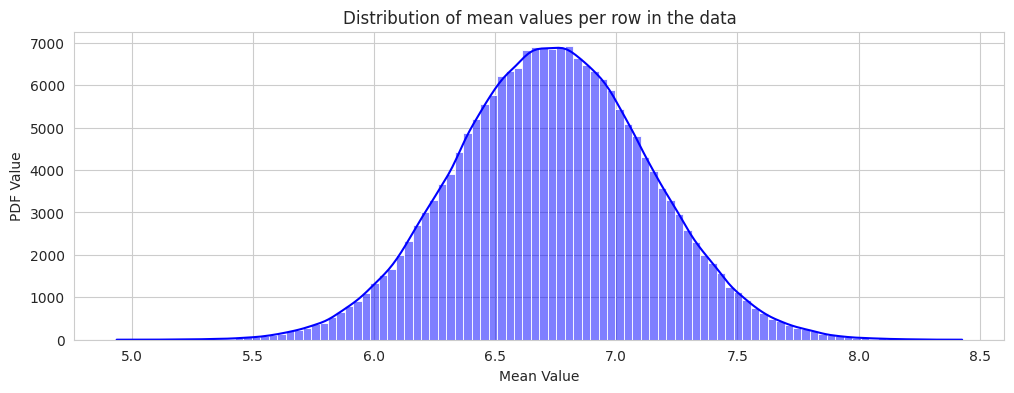

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
sns.set_style('whitegrid')

# Define the features (excluding the first column)
features = data.columns.values[1:202]

# Plot the distribution of the mean values per row
plt.title('Distribution of mean values per row in the data')
plt.xlabel('Mean Value')
plt.ylabel('PDF Value')

# Plot using histplot with kde=True to show the distribution
sns.histplot(data[features].mean(axis=1), color='blue', kde=True, bins=100)

plt.show()


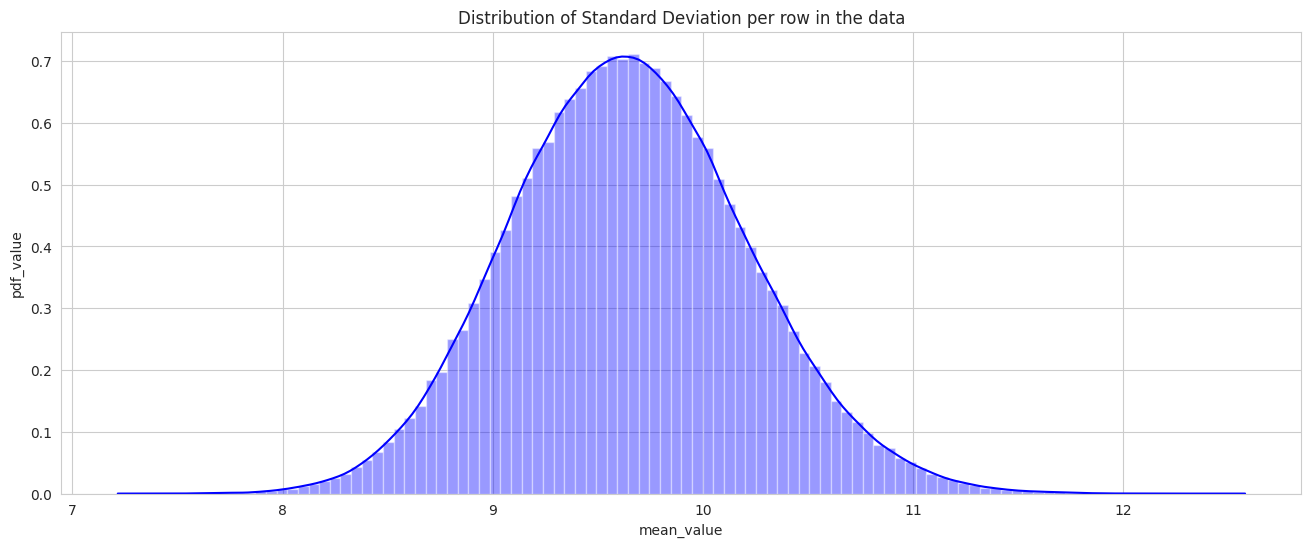

In [ ]:
plt.figure(figsize=(16,6))
sns.set_style("whitegrid")
features = data.columns.values[1:202]
plt.title('Distribution of Standard Deviation per row in the data')
plt.xlabel("mean_value")
plt.ylabel("pdf_value")
sns.distplot(data[features].std(axis=1),color="BLUE",kde=True,bins=100)
plt.show()

* This graph also look like guassian distribution around 60% of feature standard deviation around the range of 9 to 10

# **FEATURE** **ENIGNEERING**



## Handling Missing Values

In [ ]:
# check null values
pd.set_option("display.max_rows",None)
data.isnull().sum()

,0
ID_code,0
target,0
var_0,0
var_1,0
var_2,0
var_3,0
var_4,0
var_5,0
var_6,0
var_7,0


* There is no missing values in data



# Handling Duplicales

In [ ]:
data.duplicated().sum()

0

* There is no Duplicate entries in data

# Outlier Handling

### Insights from EDA

During the exploratory data analysis (EDA), we observed the following:
- The features closely align with a normal distribution.
- The distances between data points are minimal.

Based on these insights, we decided **not to impute or handle outliers explicitly**. Instead, we will apply **scaling techniques** (e.g., `RobustScaler`) to mitigate the impact of outliers. This approach ensures that the dataset remains robust while minimizing any adverse effects caused by outliers, making it more suitable for modeling.


# **FEATURE** **SELECTION**

## Handle Constant and Unique Features

In [ ]:
data.drop("ID_code",axis=1,inplace=True)

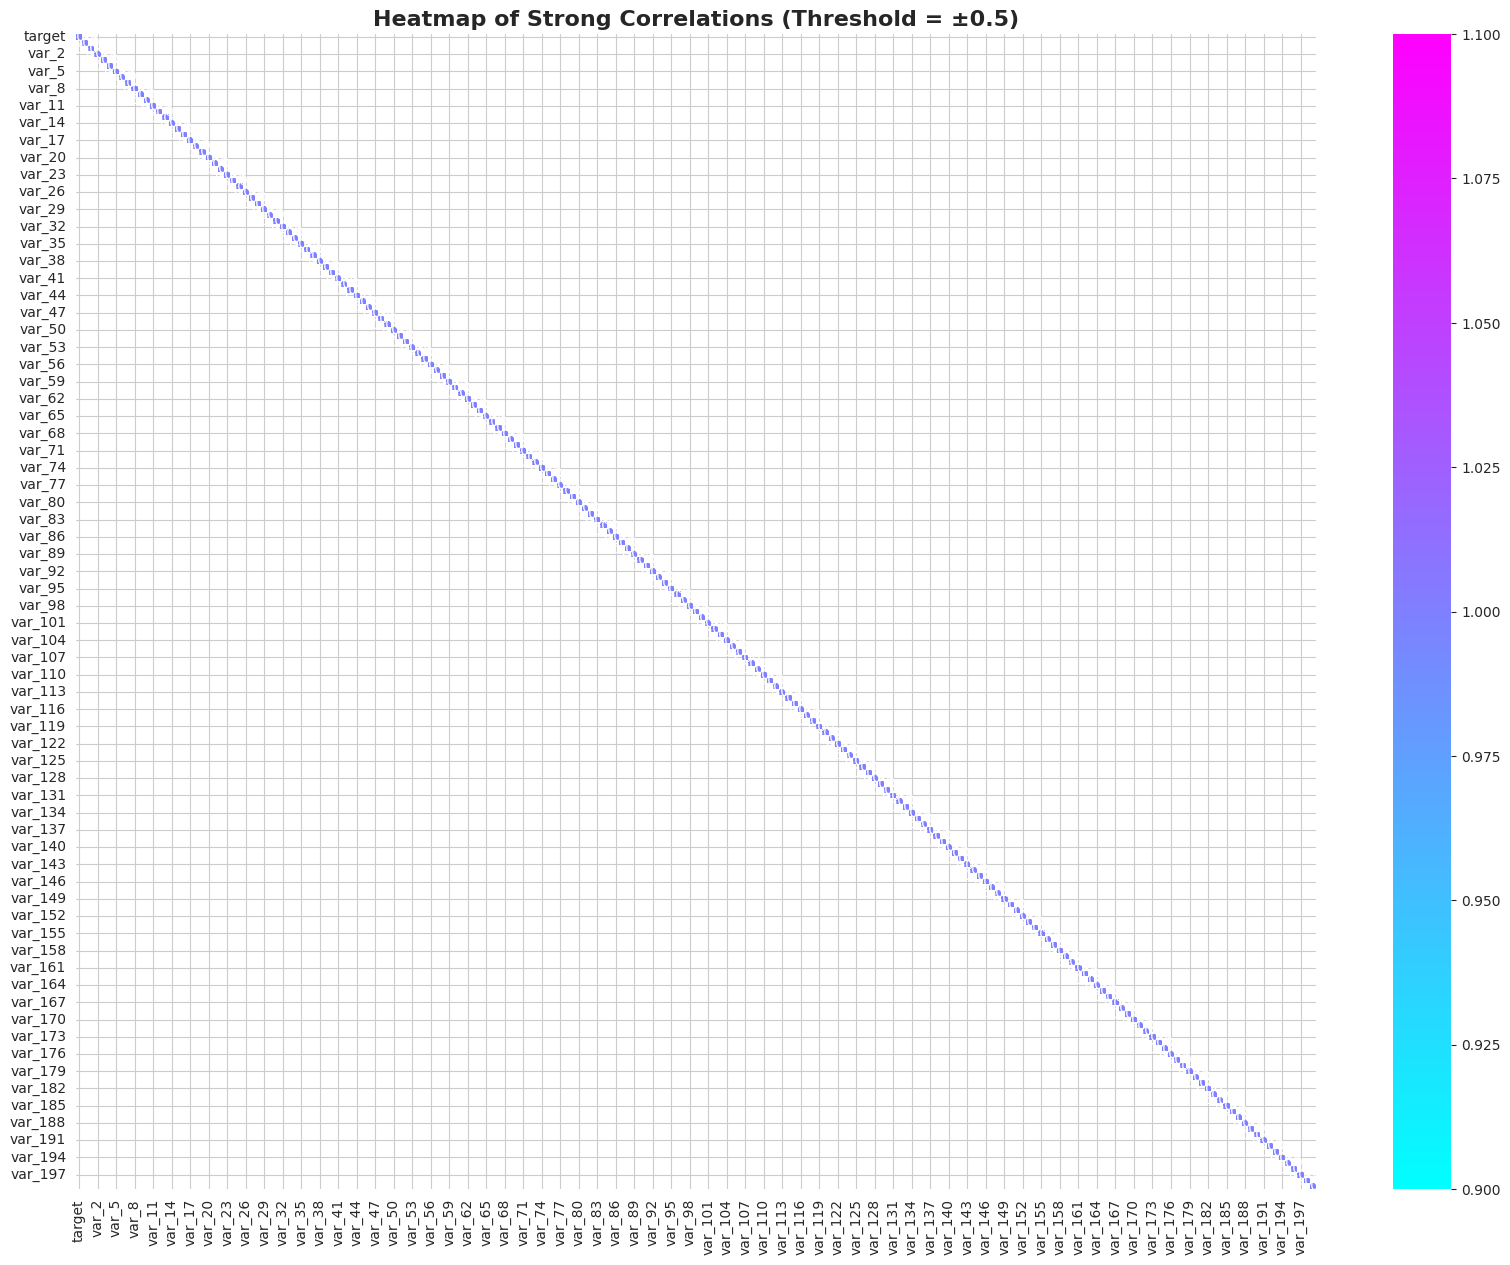

In [ ]:

# Reduce figure size and focus on the strongest correlations
plt.figure(figsize=(20, 15))

# Calculate the correlation matrix
corr_matrix = data.corr()

# Filter correlations above a certain threshold (e.g., |0.5|) for better readability
threshold = 0.5
strong_corr = corr_matrix[(corr_matrix >= threshold) | (corr_matrix <= -threshold)]
sns.heatmap(strong_corr, annot=True, cmap='cool', fmt=".2f", cbar=True)

plt.title("Heatmap of Strong Correlations (Threshold = ±0.5)", fontsize=16, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


* From the heatmap visualization, it is evident that there are no highly correlated features in the dataset.

# Features Scaling

In [ ]:
# Robust scaling
from sklearn.preprocessing import RobustScaler

features = data.drop(columns=['target'])
scaler = RobustScaler()
scaled_features = scaler.fit_transform(features)
scaled_data = pd.DataFrame(scaled_features, columns=features.columns)
scaled_data['target'] = data['target']


# Principle Component Analysis (PCA)

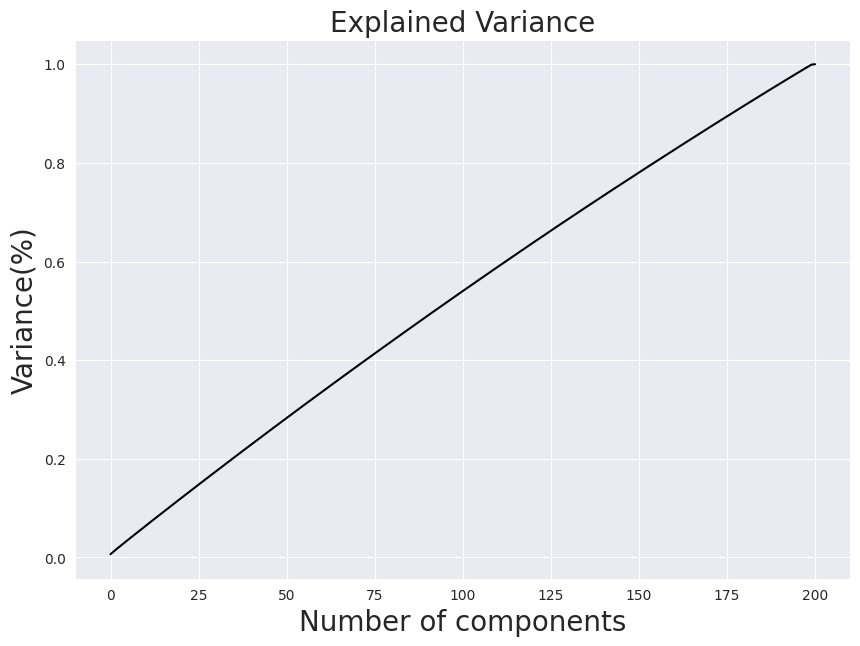

In [ ]:
# Getting the optimal value of pca
from sklearn.decomposition import PCA
pca = PCA() # Object creation
principlecomponent = pca.fit_transform(scaled_data)  # Fitting the data
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
plt.plot(np.cumsum(pca.explained_variance_ratio_),color ='k')
plt.xlabel('Number of components',fontsize=20)
plt.ylabel('Variance(%)',fontsize=20) # for each componant
plt.title('Explained Variance',fontsize=20)
plt.show()

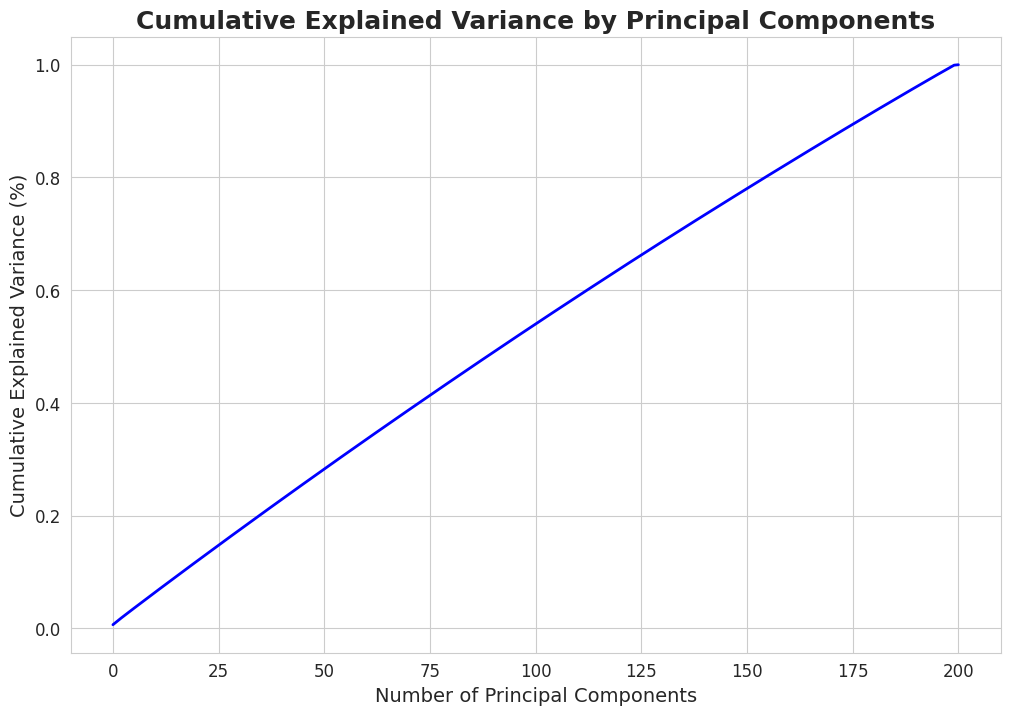

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA()
principal_components = pca.fit_transform(scaled_data)

# Plot explained variance
plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='b', linewidth=2)

# Customize plot
plt.title('Cumulative Explained Variance by Principal Components', fontsize=18, fontweight='bold')
plt.xlabel('Number of Principal Components', fontsize=14)
plt.ylabel('Cumulative Explained Variance (%)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.grid(True)
plt.show()


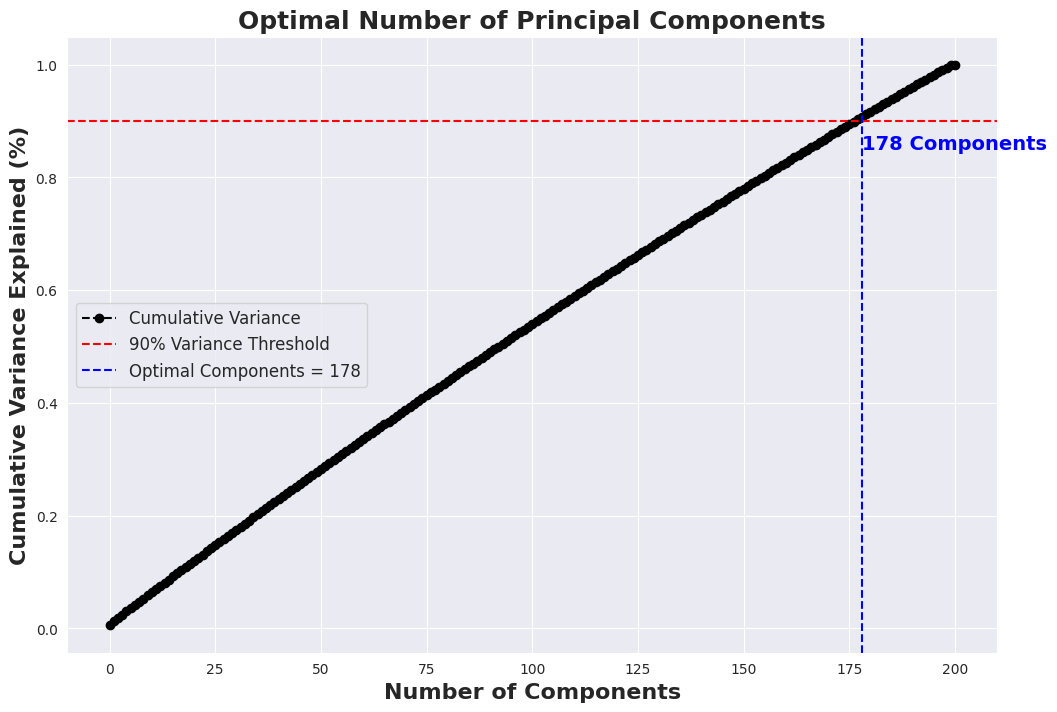

In [ ]:
from sklearn.decomposition import PCA


# Initialize PCA
pca = PCA()

# Fit the data and calculate principal components
principal_components = pca.fit_transform(scaled_data)

# Cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.figure(figsize=(12, 8))
sns.set_style('darkgrid')
plt.plot(cumulative_variance, marker='o', linestyle='--', color='black', label='Cumulative Variance')

# Highlight the 95% threshold
threshold = 0.90
optimal_components = np.argmax(cumulative_variance >= threshold) + 1
plt.axhline(y=threshold, color='red', linestyle='--', label='90% Variance Threshold')
plt.axvline(x=optimal_components, color='blue', linestyle='--', label=f'Optimal Components = {optimal_components}')

# Add labels, title, and legend
plt.xlabel('Number of Components', fontsize=16, fontweight='bold')
plt.ylabel('Cumulative Variance Explained (%)', fontsize=16, fontweight='bold')
plt.title('Optimal Number of Principal Components', fontsize=18, fontweight='bold')
plt.legend(fontsize=12)

# Annotate the optimal number of components
plt.text(optimal_components, threshold - 0.05, f'{optimal_components} Components', color='blue', fontsize=14, fontweight='bold')

# Show the plot
plt.show()


**Observation:**

From the cumulative explained variance plot, we can clearly see that the line is almost straight, indicating that the variance in the data is concentrated in a few principal components. Based on the plot, we observe that selecting **189 components** explains around **95% of the total variance**. This suggests that 189 components are sufficient to retain most of the information while reducing the dimensionality of the data.


In [ ]:
import pandas as pd

# Apply PCA with 189 components
pca = PCA(n_components=178)
new_data = pca.fit_transform(scaled_data)

# Create a DataFrame with the transformed data
new_data = pd.DataFrame(new_data, columns=[f'PC{i+1}' for i in range(178)])

# Display the DataFrame
new_data.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,PC112,PC113,PC114,PC115,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125,PC126,PC127,PC128,PC129,PC130,PC131,PC132,PC133,PC134,PC135,PC136,PC137,PC138,PC139,PC140,PC141,PC142,PC143,PC144,PC145,PC146,PC147,PC148,PC149,PC150,PC151,PC152,PC153,PC154,PC155,PC156,PC157,PC158,PC159,PC160,PC161,PC162,PC163,PC164,PC165,PC166,PC167,PC168,PC169,PC170,PC171,PC172,PC173,PC174,PC175,PC176,PC177,PC178
0,0.517589,0.269560,0.054023,-0.369893,0.835381,0.662795,1.319730,1.064223,-0.849499,0.433281,0.099748,0.189458,0.036275,0.666101,-0.022342,-0.761547,-0.166639,0.030342,-0.068087,1.435869,0.548179,1.059613,-1.190722,-0.729638,-0.071145,0.078544,-0.887911,-0.807112,0.012292,-0.763784,-0.274470,-0.372900,-0.263387,-0.002814,-0.656367,-0.047525,0.682693,0.054722,0.088106,0.400059,0.216680,-0.921100,0.608908,0.340632,0.704269,-0.170687,-0.654300,1.061424,-0.483177,1.065057,-1.490633,0.388312,-0.253202,0.513145,1.014501,-0.233567,-0.107051,-0.773744,0.066686,-0.477828,0.881100,0.525298,1.033929,0.201180,-0.691202,-0.487673,0.445280,-0.124135,-1.776024,-0.074610,-0.685690,0.032297,0.050818,0.034366,0.397986,-1.170827,0.368282,0.595141,1.006387,-0.382024,-0.535029,-0.493931,0.756615,0.714640,0.164489,0.506951,0.682040,-0.319673,1.048802,0.270264,0.624894,0.068417,-0.701790,0.475613,-0.198829,-0.755601,0.329829,-0.150092,1.165510,-1.094786,0.607245,0.807198,0.182657,0.224932,-1.100740,0.356435,0.452096,0.107081,-0.001502,1.180537,-0.631718,-0.756883,-1.088512,-0.304309,-0.186437,0.176686,-0.926008,-0.804948,0.792421,-1.048378,-0.797376,1.107738,0.291139,-0.053988,-1.002628,0.755661,-0.211778,0.234515,0.266976,-0.328136,0.648342,0.498883,0.522072,0.584286,-0.637994,0.123388,-0.333348,1.680633,0.620728,-0.031284,0.976753,-0.287220,0.397111,-0.959304,0.769188,-0.401486,-0.294892,-0.331451,0.103151,-1.979216,0.167794,-0.214290,0.403365,-0.544890,0.547660,-0.513307,-0.598169,-0.702461,-0.554514,-0.282646,0.129703,-1.053936,-0.667963,-0.169669,-1.219645,-0.554410,-0.611039,1.112001,-0.258308,-0.751815,0.967646,-0.750007,-0.911975,0.028257,-0.018238,-0.115137,0.218833,-0.254579
1,-1.324007,-0.533579,1.958171,1.308587,0.328150,0.049564,-1.179654,0.139923,0.443926,0.601061,0.507448,0.290780,-2.031748,-1.611884,-0.508465,0.886412,-0.154350,-0.436477,-0.736805,-0.529373,1.095882,-0.959536,1.069778,1.143183,2.077901,-0.579774,1.045354,0.939488,0.376925,0.163353,0.055867,-0.105673,0.970089,0.221928,0.833694,1.083230,-0.575362,1.052924,-0.173764,-0.949257,-0.279215,-0.698407,0.107007,-0.484972,-1.349184,0.738426,-0.073452,-0.602862,0.583670,-0.220609,0.306837,-0.204201,-0.228406,0.633989,-0.153384,0.466705,-0.628820,-0.603458,-1.086874,1.179418,0.334649,0.610178,-0.116334,0.111064,-0.683004,1.137632,-0.223746,-0.423983,0.800753,0.838010,-0.190419,-0.771438,0.256354,0.129691,-0.351200,0.497553,-1.241447,-0.499981,0.798423,-0.622427,-0.289117,0.650573,-0.136576,0.584297,0.110860,0.206038,0.438245,-0.541694,0.912810,0.077358,0.330347,1.128143,0.679547,-0.558082,0.370086,0.233700,-0.451091,0.351500,0.282666,1.002136,0.024931,1.136643,-0.046010,-0.513514,1.083092,1.365194,0.171206,0.028797,-0.311181,0.808733,0.251169,-0.152583,0.291193,-0.772977,0.671171,1.461625,0.492782,-0.479170,0.949655,0.332061,-0.031731,-0.234562,0.318108,-1.348991,-0.399963,-0.732549,-0.580642,0.558389,0.892253,0.425669,0.031629,-0.310980,-1.470945,-0.416889,-0.153782,-0.568804,-0.402385,-0.219356,0.999554,0.168548,-1.378714,-0.271024,-1

# **MODEL** **CREATION**

**AIM**
* In customer transaction prediction f1 score metrix is important so we need more focus to improve f1 score
* Create a sweet spot model (Low bias, Low variance)

# Define Independant And Dependant Veriable

In [ ]:
X = new_data
y = data.target

# Balancing Data

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE
sm = SMOTE()
print("Unbalanced Data :",Counter(y))
X_sm,y_sm = sm.fit_resample(X,y)
print("Balanced Data :",Counter(y_sm))


Unbalanced Data : Counter({0: 179902, 1: 20098})
Balanced Data : Counter({0: 179902, 1: 179902})


# Split Training And Testing Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_sm,y_sm,test_size=30,random_state=80)


# **Logistic** **Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_test_predict =lr.predict(X_test)
y_train_predict = lr.predict(X_train)

# Training Accurancy
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lr_train_accuracy = accuracy_score(y_train,y_train_predict)
print(f"Training accuracy of logistic regression model : {round(lr_train_accuracy*100,2)}")

print("Logistic Regression training classification report : \n",classification_report(y_train_predict,y_train))


# Training Accuracy
lr_test_accuracy = accuracy_score(y_test,y_test_predict)
print(f"Testing accuracy of Logistic Regression model : {round(lr_test_accuracy*100,2)} ")

print("Logistic Regression training classification report : \n",classification_report(y_test_predict,y_test))



Training accuracy of logistic regression model : 83.57
Logistic Regression training classification report : 
               precision    recall  f1-score   support

           0       0.83      0.84      0.83    176939
           1       0.84      0.83      0.84    182835

    accuracy                           0.84    359774
   macro avg       0.84      0.84      0.84    359774
weighted avg       0.84      0.84      0.84    359774

Testing accuracy of Logistic Regression model : 83.33 
Logistic Regression training classification report : 
               precision    recall  f1-score   support

           0       0.75      0.92      0.83        13
           1       0.93      0.76      0.84        17

    accuracy                           0.83        30
   macro avg       0.84      0.84      0.83        30
weighted avg       0.85      0.83      0.83        30

